# Regresión

Vamos a trabajar con el dataset de paltas (*avocados*). Su descripción la pueden encontrar en https://www.kaggle.com/neuromusic/avocado-prices.

### 1. Carga de datos

a. Abrir el dataset (DataSets/Avocado.csv). Parsear fechas con la columna "Date".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
palta = pd.read_csv('../DataSets/avocado.csv', delimiter=',', parse_dates=["Date"])
palta.drop('Unnamed: 0', axis = 1, inplace = True)
palta.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
palta.sort_values("Date", inplace = True)
palta.reset_index(inplace = True, drop  = True)

In [4]:
palta_chicago = palta[palta.region == 'Chicago']
palta_chicago.reset_index(inplace = True, drop = True)
palta_chicago.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
1,2015-01-04,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago
2,2015-01-11,1.79,12915.74,1426.75,10900.10,0.00,588.89,588.89,0.00,0.00,organic,2015,Chicago
3,2015-01-11,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago
4,2015-01-18,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago


In [5]:
import datetime as dt
palta_chicago['Date']=palta_chicago['Date'].map(dt.datetime.toordinal)
palta_chicago.head()

<ipython-input-5-98e6e1713964>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  palta_chicago['Date']=palta_chicago['Date'].map(dt.datetime.toordinal)


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,735602,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
1,735602,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago
2,735609,1.79,12915.74,1426.75,10900.10,0.00,588.89,588.89,0.00,0.00,organic,2015,Chicago
3,735609,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago
4,735616,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago


In [6]:
palta_chicago_convencional = palta_chicago[palta_chicago.type == 'conventional']
palta_chicago_convencional.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1,735602,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago
3,735609,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago
4,735616,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago
6,735623,1.22,745439.17,26117.56,488218.44,145882.24,85220.93,75867.61,9265.81,87.51,conventional,2015,Chicago
8,735630,0.91,1133491.66,50783.91,824745.44,164884.41,93077.90,89516.93,3448.62,112.35,conventional,2015,Chicago


In [7]:
X = palta_chicago_convencional.Date.values
y = palta_chicago_convencional.AveragePrice.values
print(X.shape, y.shape)

(169,) (169,)


In [8]:
X = palta_chicago_convencional.Date.values
y = palta_chicago_convencional.AveragePrice.values
print(X.shape, y.shape)

(169,) (169,)


In [11]:
X = X.reshape(-1,1)
print(X.shape)

(169, 1)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(118, 1)
(51, 1)
(118,)
(51,)


### KNN y Árboles

1. Entrenar un modelo de árbol de regresión y un modelo de KNN de regresión, primero usando las mismas variables que para la regresión lineal y después agregando más. Por ejemplo, ¿qué pasa si agregamos la variable "type"?¿Cómo trabajan estos modelos con variables categóricas?
2. Evaluar los desempeños de cada modelo. ¿Qué métricas usarían?¿Hay grandes diferencias?

#### Árboles

In [13]:
from sklearn.tree import DecisionTreeRegressor
max_depth = 2
rgr_tree = DecisionTreeRegressor(criterion= 'mse',max_depth = max_depth, random_state = 42)
rgr_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

Calculamos MSE

In [15]:
from sklearn.metrics import mean_squared_error
y_train_pred_tree = rgr_tree.predict(X_train)
y_test_pred_tree = rgr_tree.predict(X_test)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred_tree))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred_tree))

Error en datos de train: 0.04062731653939281
Error en datos de test: 0.06621250167226654


Y graficamos.

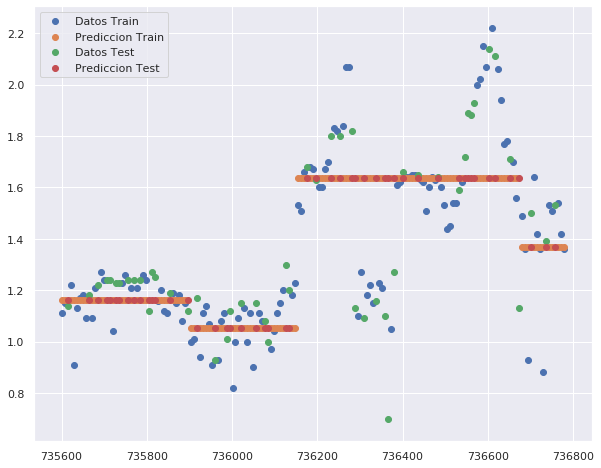

In [16]:
plt.figure(figsize = (10,8))

plt.scatter(X_train, y_train, label = 'Datos Train')
plt.scatter(X_train, y_train_pred_tree, label = 'Prediccion Train')

plt.scatter(X_test, y_test, label = 'Datos Test')
plt.scatter(X_test, y_test_pred_tree, label = 'Prediccion Test')

plt.legend()
plt.show()

#### KNN

¿Por qué no hace falta normalizar en este caso?

In [17]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors = 50
rgr_knn = KNeighborsRegressor(n_neighbors = n_neighbors)
rgr_knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=50)

Calculamos MSE

In [18]:
y_train_pred_knn = rgr_knn.predict(X_train)
y_test_pred_knn = rgr_knn.predict(X_test)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred_knn))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred_knn))

Error en datos de train: 0.062221521016949166
Error en datos de test: 0.0762539341176471


Y graficamos.

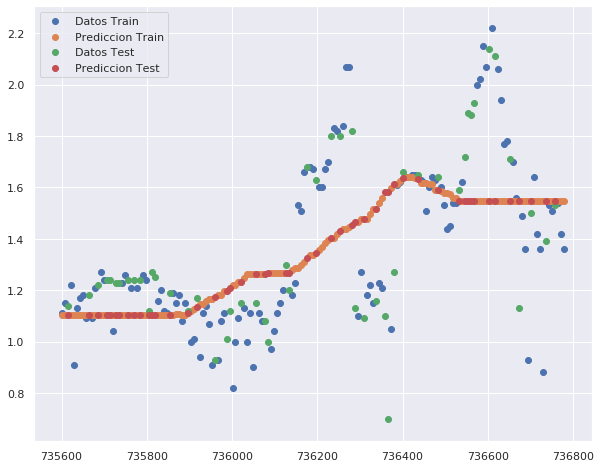

In [19]:
plt.figure(figsize = (10,8))

plt.scatter(X_train, y_train, label = 'Datos Train')
plt.scatter(X_train, y_train_pred_knn, label = 'Prediccion Train')

plt.scatter(X_test, y_test, label = 'Datos Test')
plt.scatter(X_test, y_test_pred_knn, label = 'Prediccion Test')

plt.legend()
plt.show()

#### Más variables


In [20]:
palta_chicago.type = palta_chicago.type.map({'conventional': 0, 'organic': 1})
palta_chicago.head()

/home/ubuntu/anaconda3/envs/datascience/lib/python3.9/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,735602,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,1,2015,Chicago
1,735602,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,0,2015,Chicago
2,735609,1.79,12915.74,1426.75,10900.10,0.00,588.89,588.89,0.00,0.00,1,2015,Chicago
3,735609,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,0,2015,Chicago
4,735616,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,0,2015,Chicago


In [21]:
X = palta_chicago[['Date','type']].values
y = palta_chicago.AveragePrice.values
print(X.shape, y.shape)

(338, 2) (338,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(236, 2)
(102, 2)
(236,)
(102,)


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train);

In [24]:
X_train_scal = scaler.transform(X_train)  
X_test_scal = scaler.transform(X_test)  

In [25]:
n_neighbors = 5
rgr_knn = KNeighborsRegressor(n_neighbors = n_neighbors, weights='uniform')
rgr_knn.fit(X_train_scal,y_train)

KNeighborsRegressor()

Calculamos MSE

In [26]:
y_train_pred_knn = rgr_knn.predict(X_train_scal)
y_test_pred_knn = rgr_knn.predict(X_test_scal)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred_knn))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred_knn))

Error en datos de train: 0.012593779661016949
Error en datos de test: 0.017026941176470578


Y graficamos.

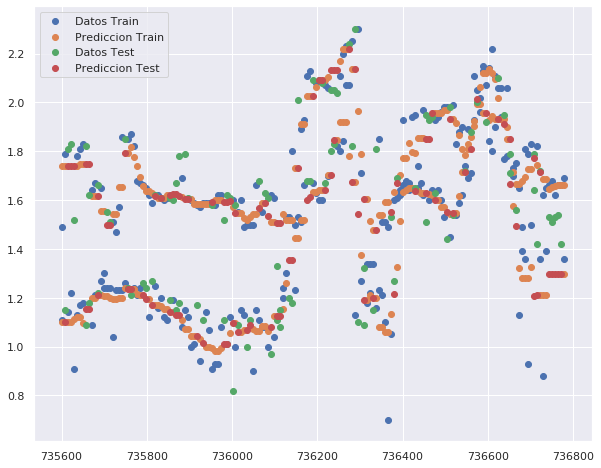

In [27]:
plt.figure(figsize = (10,8))

plt.scatter(X_train[:,0], y_train, label = 'Datos Train')
plt.scatter(X_train[:,0], y_train_pred_knn, label = 'Prediccion Train')

plt.scatter(X_test[:,0], y_test, label = 'Datos Test')
plt.scatter(X_test[:,0], y_test_pred_knn, label = 'Prediccion Test')

plt.legend()
plt.show()

En particular la regresión Lasso es interpretable: 
- mientras más grande el coeficiente para una feature, más relevante es esta para la regresión.
- la regresión Lasso trata de seleccionar un pequeño número de features relevantes.

In [28]:
palta_lasso = palta_chicago[['Date','AveragePrice','Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags','type']]

In [29]:
X = palta_lasso[['Date','AveragePrice','Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags','type']]

In [30]:
y = palta_lasso[['type']]

In [31]:
from sklearn.linear_model import Lasso
model = Lasso()

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [33]:
len(X_train)/len(X)

0.7485207100591716

In [34]:
model.fit(X_train,y_train)

Lasso()

In [35]:
model.score(X_test,y_test)

0.9551342727614268

In [36]:
model.coef_

array([ 0.00000000e+00, -0.00000000e+00, -5.47611271e-07, -5.81111729e-06,
       -3.74835277e-07,  6.41878235e-06, -9.68976738e-06,  0.00000000e+00])

In [37]:
var = np.floor(np.log10(np.abs(model.coef_)))

<ipython-input-37-aebe47467b04>:1: RuntimeWarning: divide by zero encountered in log10
  var = np.floor(np.log10(np.abs(model.coef_)))


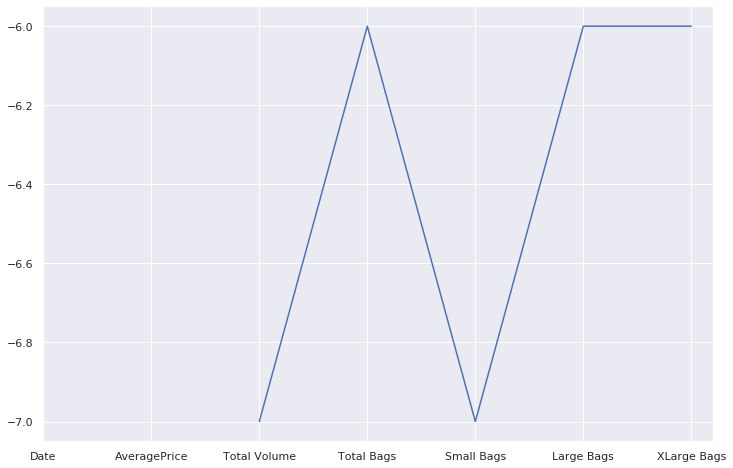

In [38]:
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(var)
plt.xticks(np.arange(7),list(X.columns));

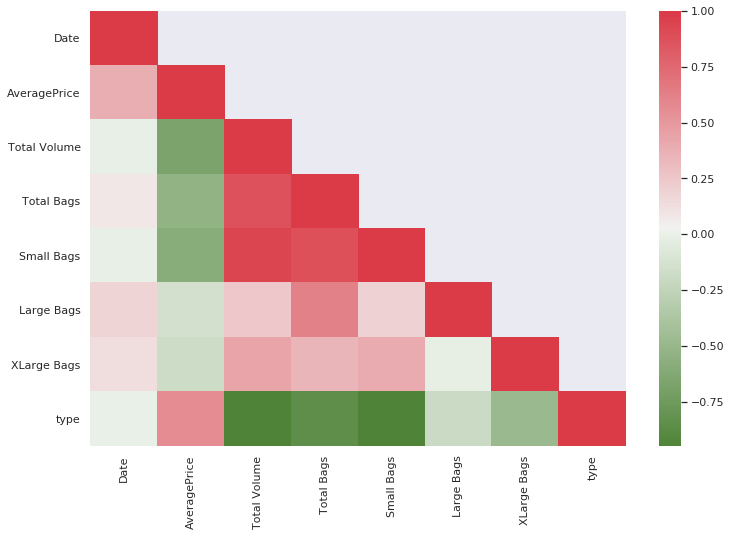

In [39]:
# Sacamos el id
dt = palta_lasso

corr = dt.corr() #returns a dataframe, so it can be reused

# Quitamos el triangulo superior para facilitar la lectura
bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)
corr = corr.where(bool_upper_matrix)


# Utilizamos el heatmap de seaborn para visualizar
sns.heatmap(corr, cmap=sns.diverging_palette(120, 10, as_cmap=True),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)